In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.shape

(891, 12)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# EDA (Exploratory Data Analysis)

## Missing Data

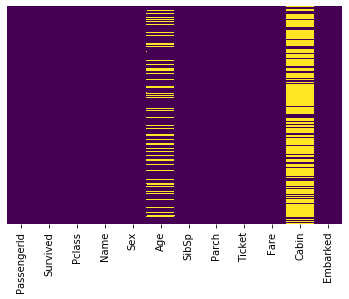

In [10]:
# We can use seaborn to craete a simple heatmap to see where we are missing data

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

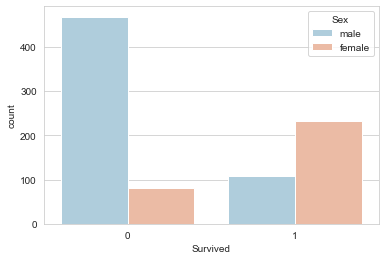

In [11]:
#count the plot people survived
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train, palette = "RdBu_r")

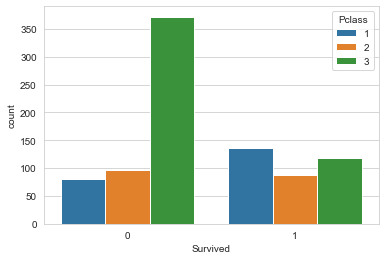

In [12]:
# no. of people who survived according to their Passenger class
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)

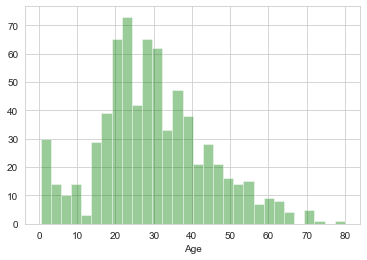

In [13]:
#distribution plot of age of people
sns.distplot(train['Age'].dropna(), kde = False, bins = 30, color = 'Green')

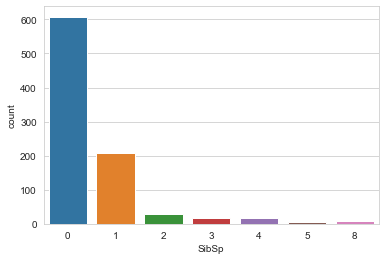

In [14]:
#countplot of the people having sibiling or spouce
sns.countplot(x = 'SibSp', data = train)

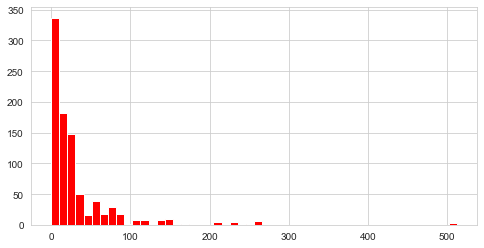

In [15]:
#distribution polt of the ticket fare
train['Fare'].hist(color = 'red', bins = 50, figsize = (8, 4))

# Data Cleaning

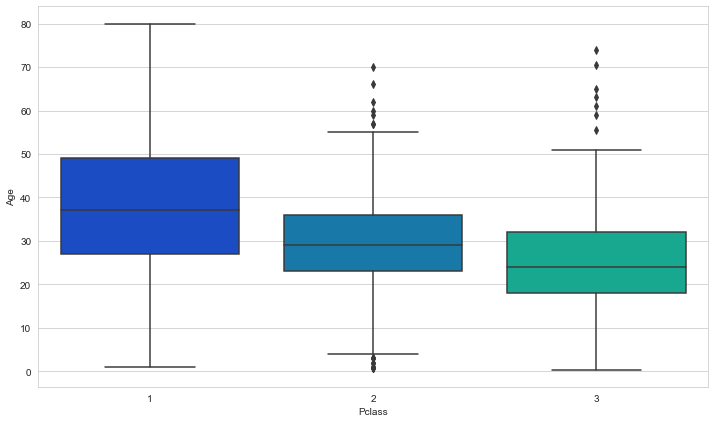

In [16]:
#boxplot with age on y-axis and Passenger class on x-axis
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train, palette = 'winter')

###### We can see wealtheir passengers in the higer class tends to be older, which make sense. We will use these average age values to impute based on Pclass for age

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

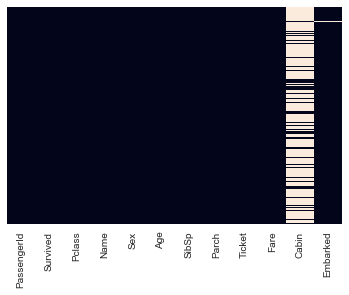

In [19]:
sns.heatmap(train.isnull(), cbar = False, yticklabels = False)

In [20]:
# drop the cabin columns and the row is embarked that is NaN

train.drop('Cabin', axis = 1, inplace = True)

In [21]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

# converting categorical features

In [22]:
sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [23]:
# drop the sex embarked, name and ticket columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [24]:
#concatenate new sex and embark columns to our train dataframe
train = pd.concat([train, sex, embark], axis = 1)

In [25]:
# check the head of dataframe
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [26]:
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.3, random_state = 100)

In [27]:
logmod = LogisticRegression()

In [28]:
logmod.fit(x_train, y_train)

C:\Users\mugee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# predictions
predictions = logmod.predict(x_test)

# Model Evolution

In [30]:
#classification report
print('Classification Report:\n', classification_report(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       159
           1       0.80      0.64      0.71       109

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.78       268



In [31]:
#confusion matrix
print('Confustion matrix:\n', confusion_matrix(y_test, predictions))

Confustion matrix:
 [[141  18]
 [ 39  70]]


In [33]:
# Accuracy
print('Accuracy Score: %.2f' %(accuracy_score(y_test, predictions)*100))

Accuracy Score: 78.73
